In [216]:
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [217]:
df = pd.read_csv('final.csv')

In [218]:
df.head()

,Data,TemperatureMedium,TemperatureMin,TemperatureMax,Precipitacao (mm),EndOfWeek,Consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [219]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Data                 365 non-null object
TemperatureMedium    365 non-null float64
TemperatureMin       365 non-null float64
TemperatureMax       365 non-null float64
Precipitacao (mm)    365 non-null float64
EndOfWeek            365 non-null int64
Consumption          365 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.0+ KB


Data                  object
TemperatureMedium    float64
TemperatureMin       float64
TemperatureMax       float64
Precipitacao (mm)    float64
EndOfWeek              int64
Consumption          float64
dtype: object

In [220]:


df=df[['TemperatureMedium', 'Consumption']]

In [221]:

X=df[['TemperatureMedium']]
Y=df[['Consumption']]


In [222]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
TemperatureMedium    365 non-null float64
dtypes: float64(1)
memory usage: 2.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
Consumption    365 non-null float64
dtypes: float64(1)
memory usage: 2.9 KB


In [223]:
X_train, X_test , y_train , y_test = train_test_split(X,Y)

In [224]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('Training score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.005254856542038278
Test score: -0.0003334069940885698
RMSE: 2003.593260618538


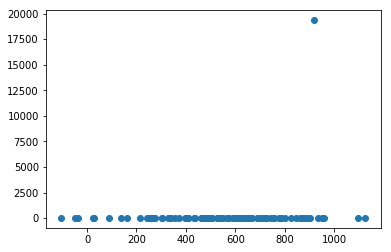

In [233]:
plt.scatter(y_pred,y_test)

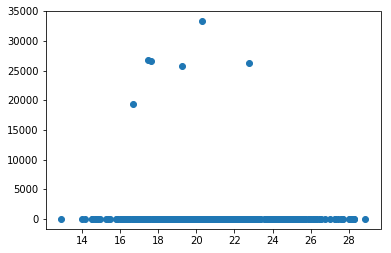

In [234]:
plt.scatter(X,Y)